In [39]:
%matplotlib inline
from IPython.display import Image
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from decimal import Decimal
import scipy.optimize
import seaborn as sns
from IPython.display import Image
import math

## Part 1: Full-wave Bridge Rectifier.

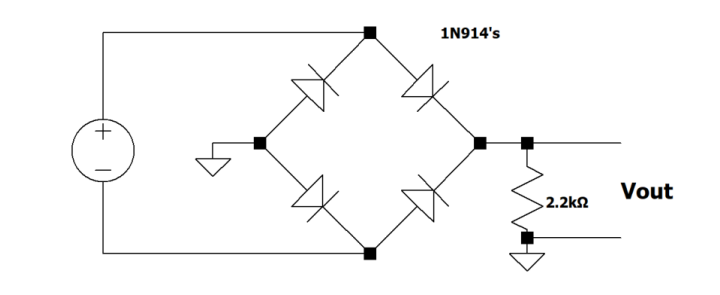

In [24]:
Image("LAB5-12.png")

The first part of the lab is to set up the voltage source. Apparently we are supposed to use a transformer here but we are getting past this by getting funky with our waveforms. By opening the wavegen and editing both channels, I used the settings below.

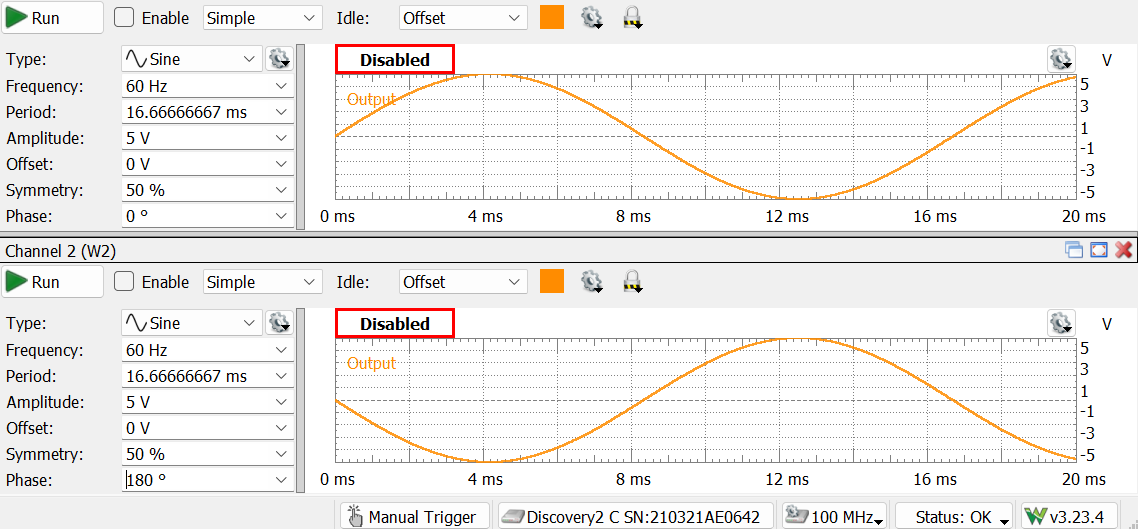

In [8]:
Image("LAB5-1.png")

I predict the voltage output of the ADC to be 10 Volts in total. I can measure this by connecting +1 to w1 and -1 to w2 on the ADC. 

### Every wavegen in this lab is 60Hz with an amplitude of 5V. The channel two wave is alwasy at a phase shift of 180.

## Make sure to turn on synchronization!!!

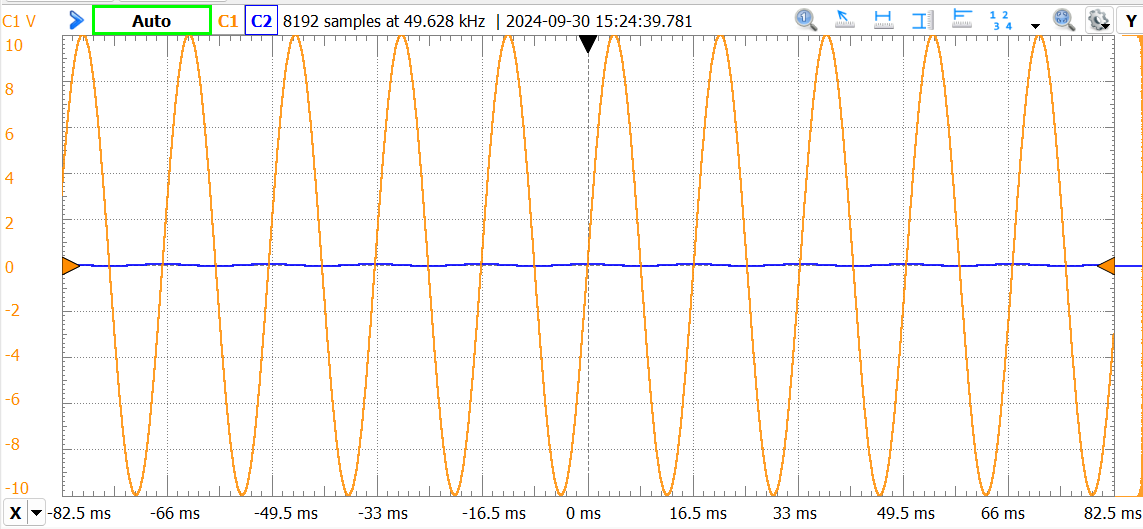

In [10]:
Image("LAB5-2.png")

The scope comes out as so. it is evident that the total voltage goes from 10V to -10V. Next is to build the circuit.

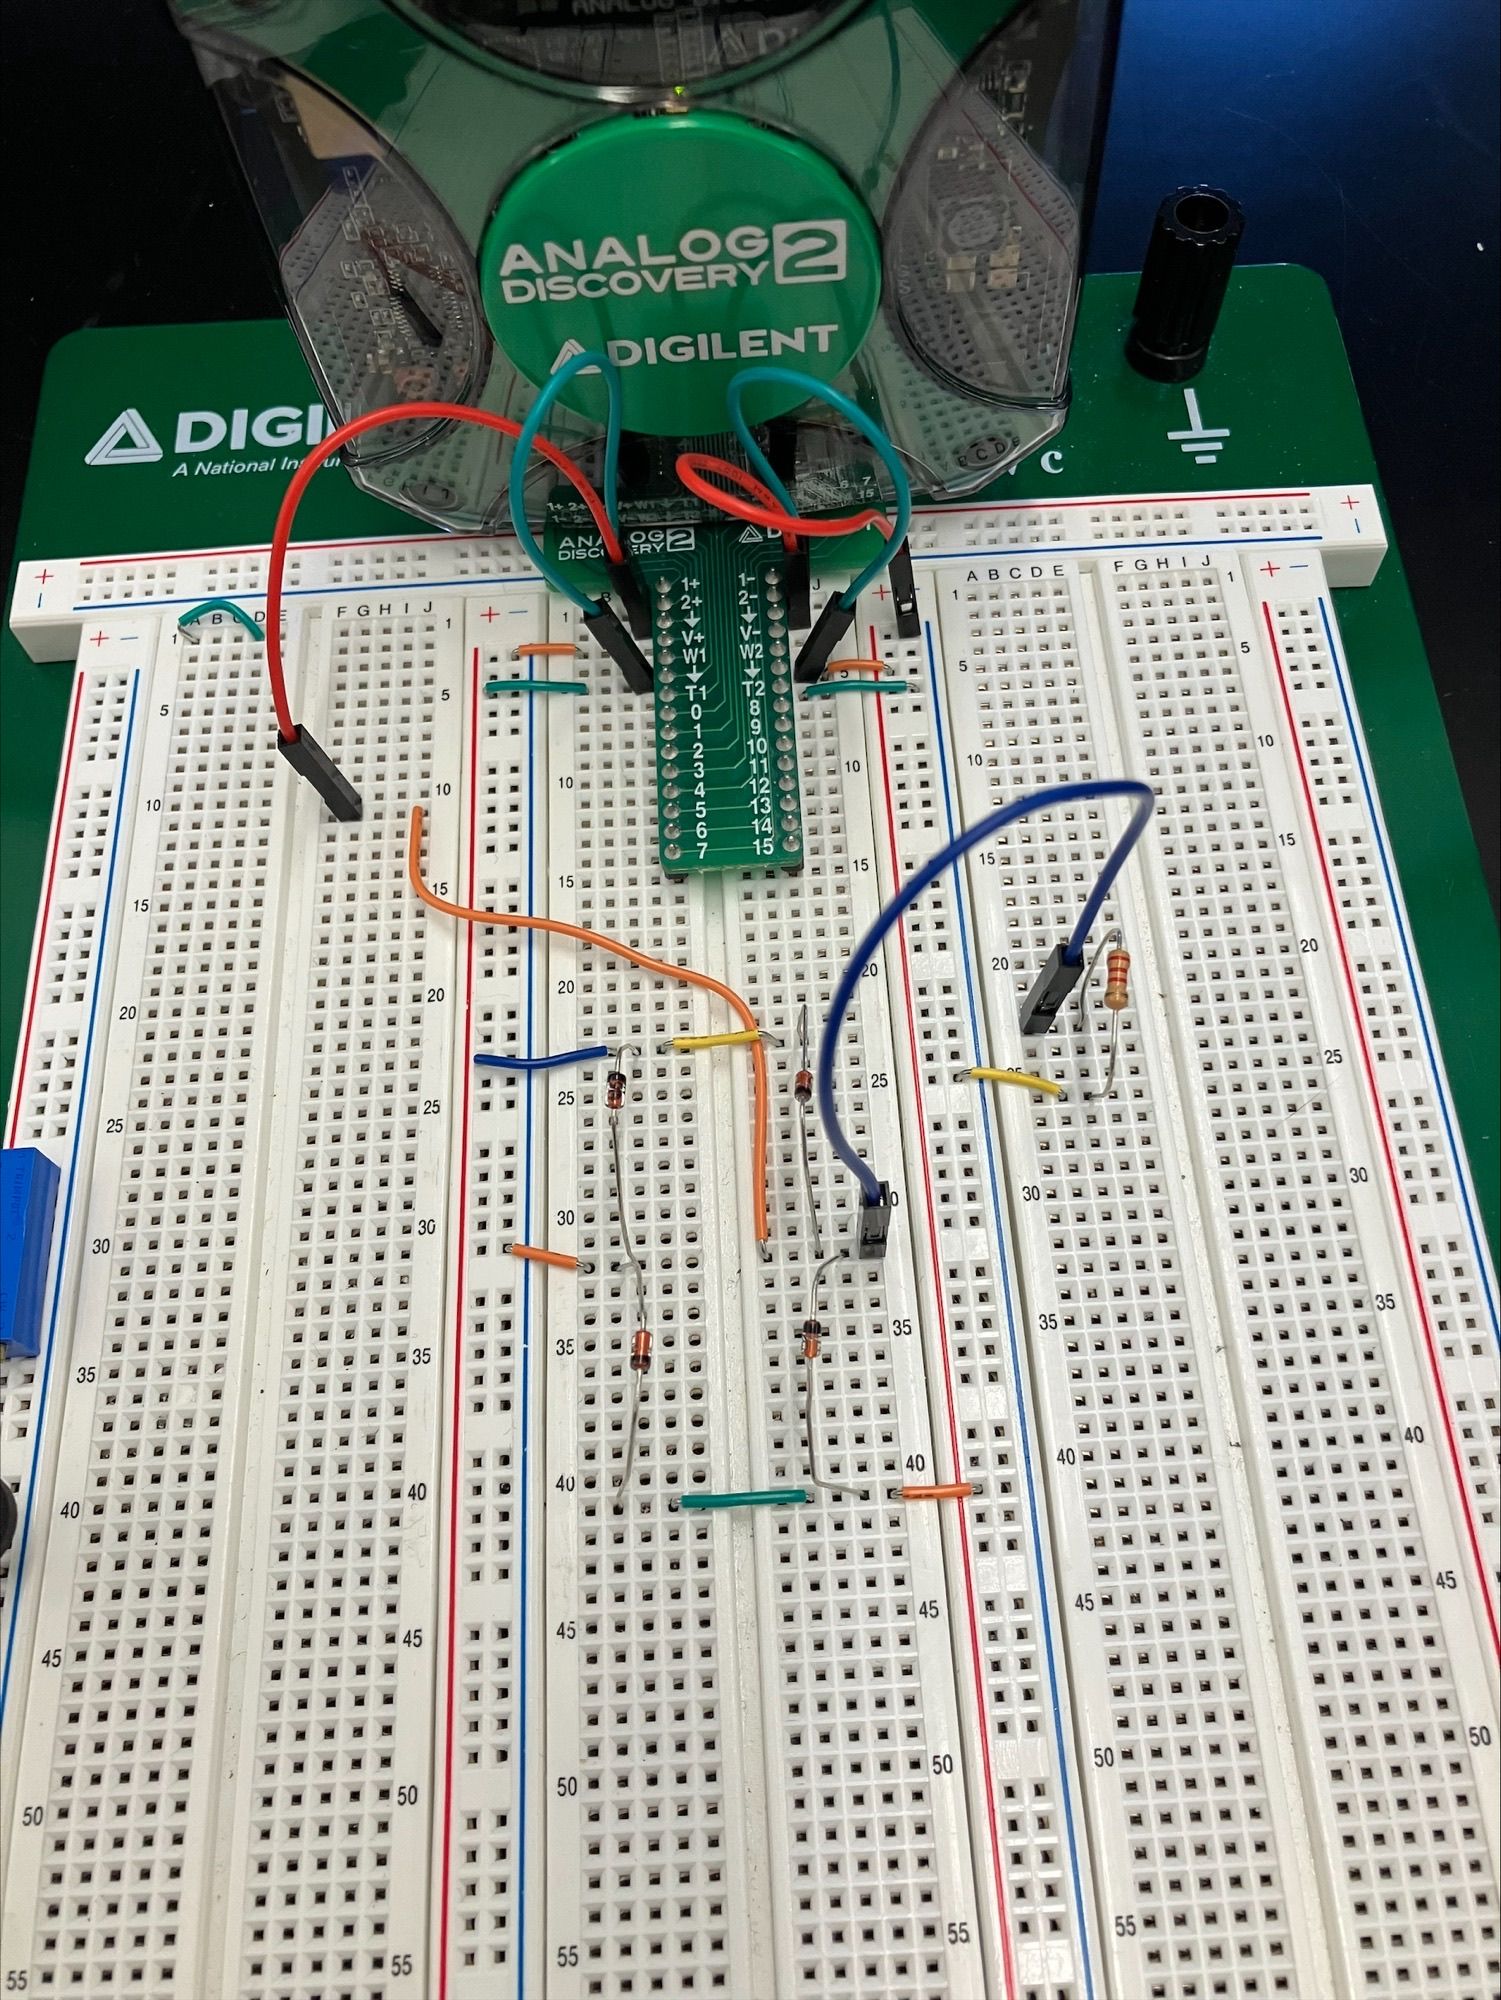

In [3]:
Image("LAB5-1.jpeg")

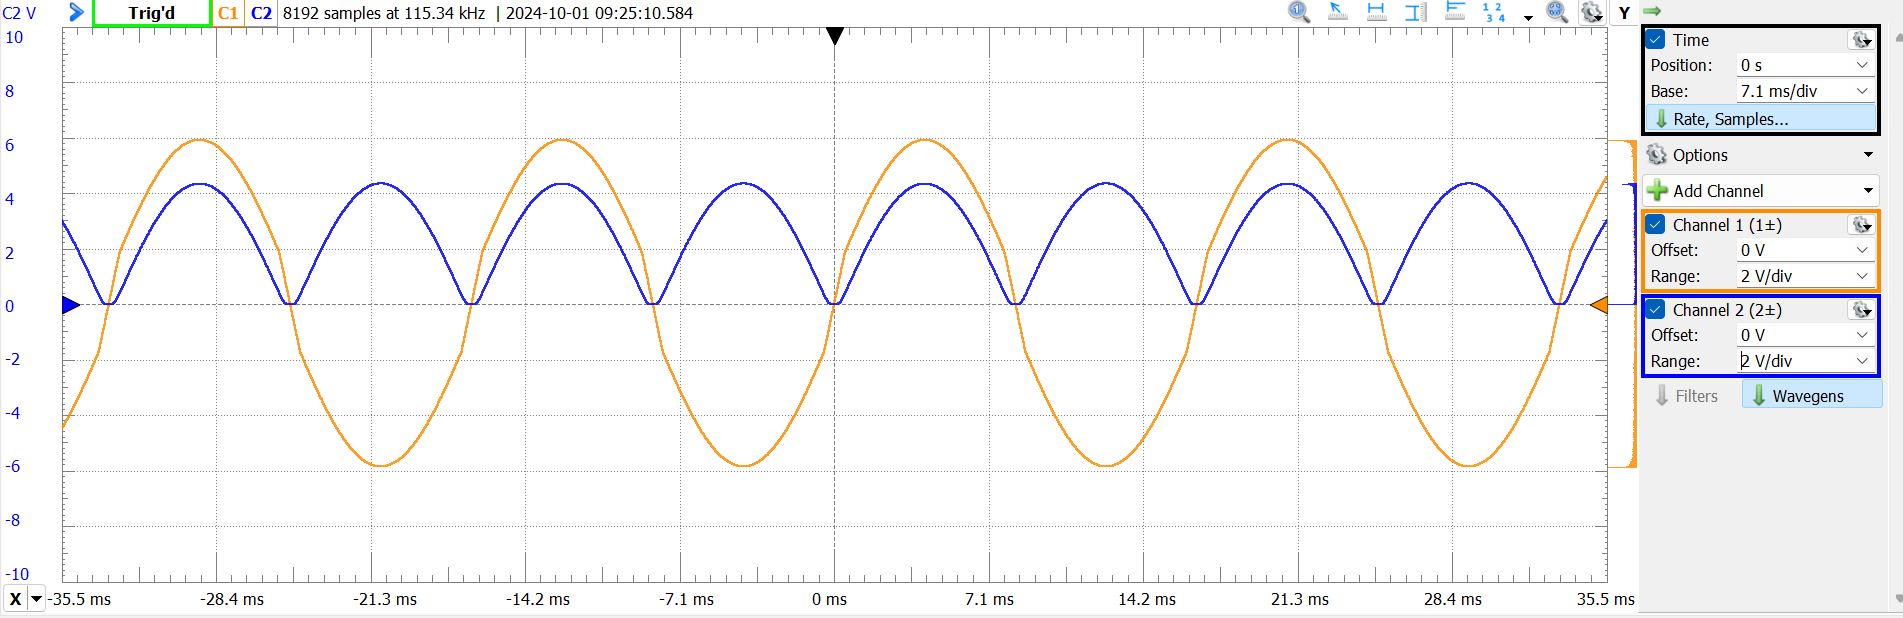

In [17]:
Image("LAB5-3.png")

This was is the voltage across the resistor in the circuit.
I have no idea if this is what it is supposed to look like.
Next is to stick a capacitor in parallel with the resistor.

The following circuit is here:

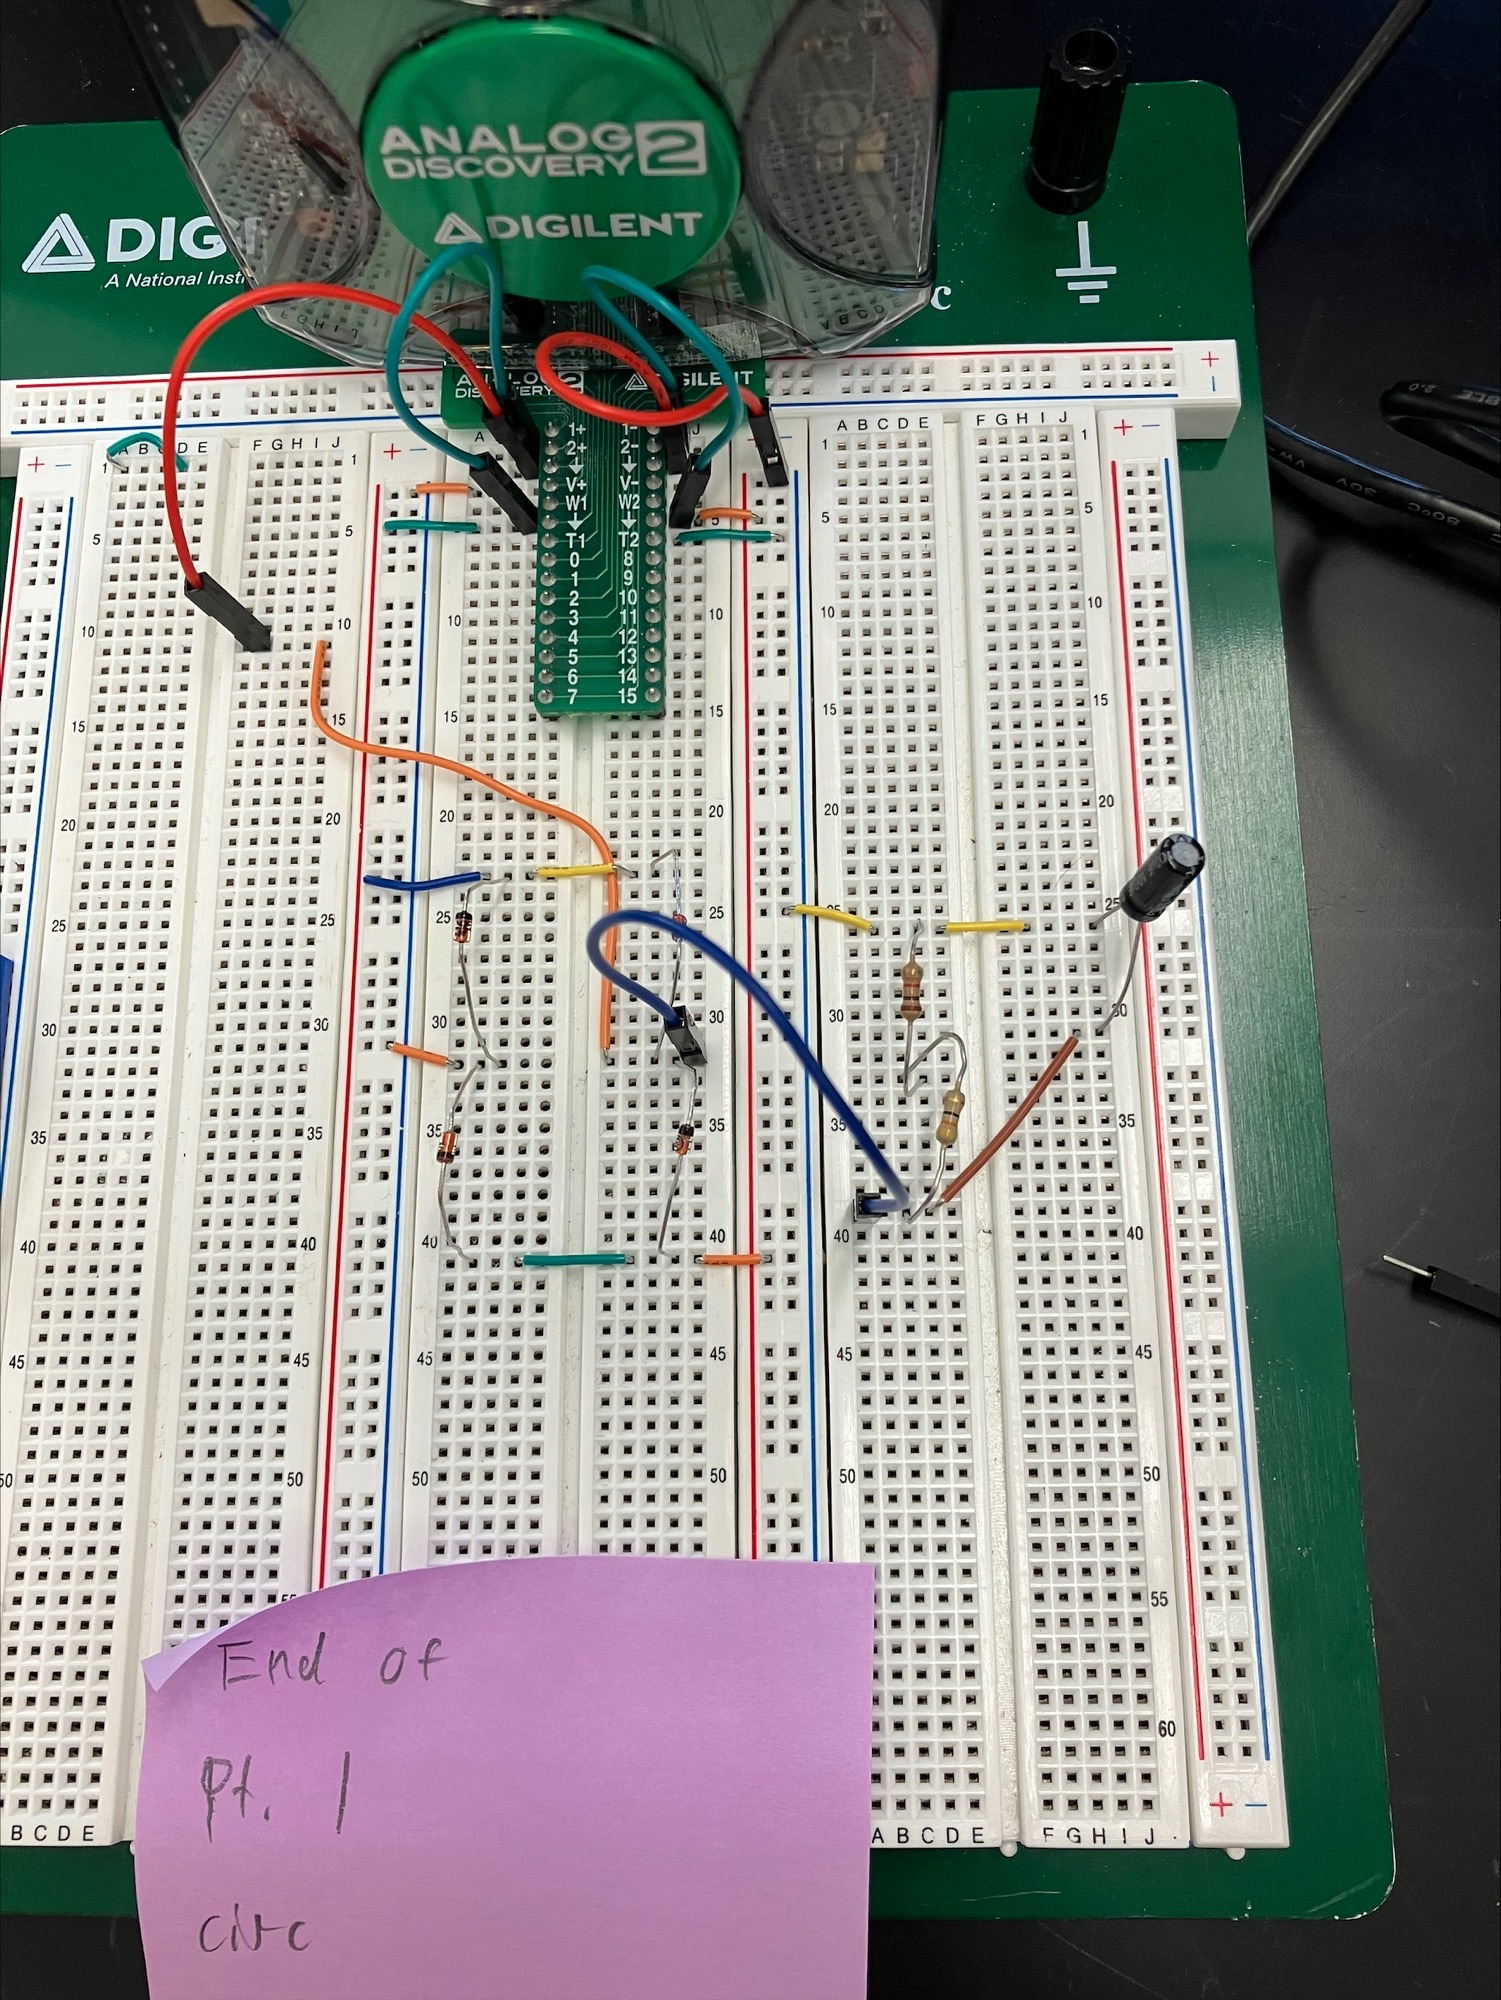

In [5]:
Image("LAB5-2.jpeg")

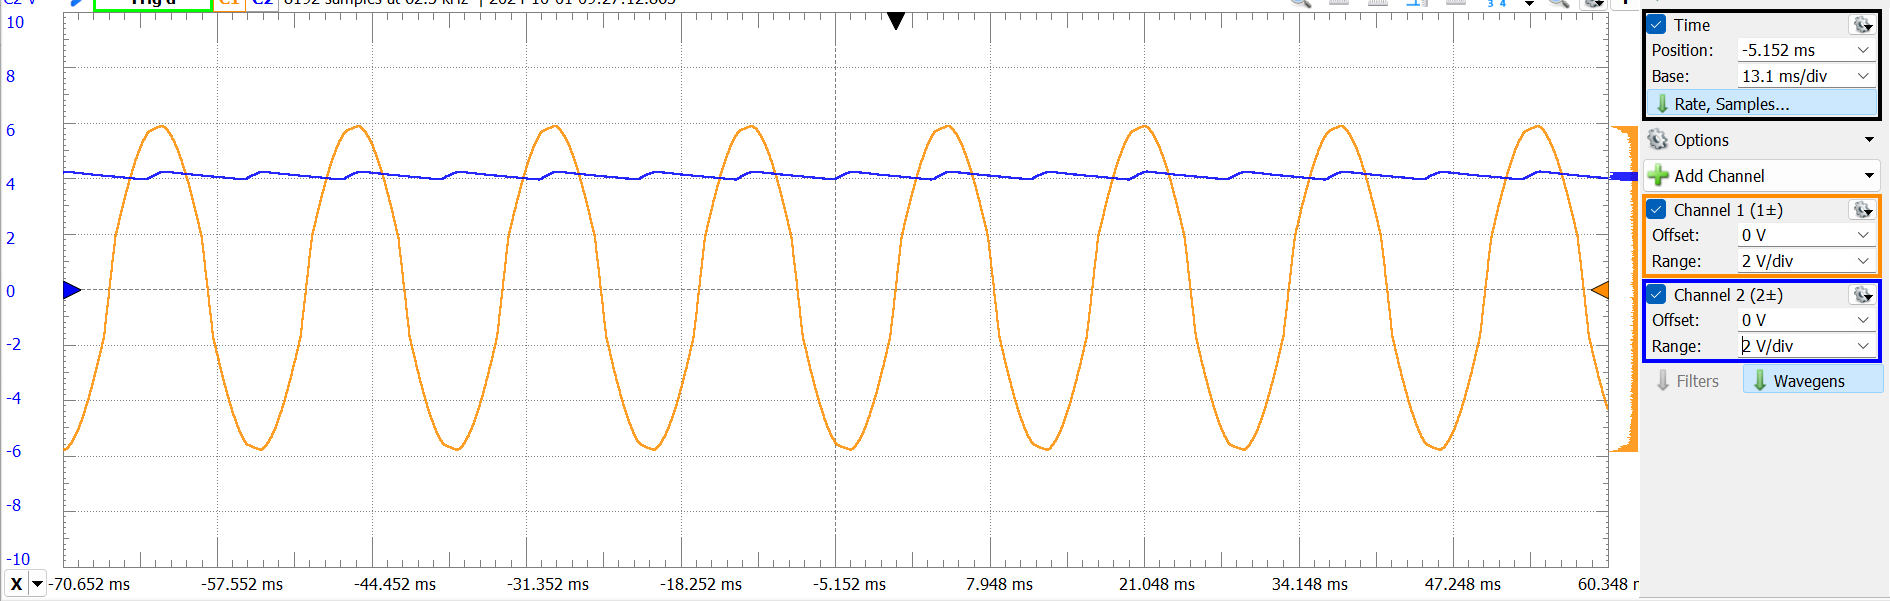

In [20]:
Image("LAB5-4.png")

From the equation $$ I = C* dV/dT $$
I get $$ \Delta V = 1/C * \Delta t = I_l/(2fC) $$
This will be used to predict the ripple which we will then measure.
By using the measurement tool in Waveforms, I can directly measure the average value of channel 2. This gives an average of about 4.1V.
We know that the voltage across the resistor is 10V. Through Ohm's Law, we know that the current will be 4.1V/2.2kOhms.

In [44]:
4.1/2.2e3

0.0018636363636363635

The current is 1.86 mA

In [26]:
def Ripple(I_l, f, C):
    V_delta = I_l / (2*f*C)
    return V_delta

In [46]:
I_l = 1.86e-3
f = 60
C = 47e-6
print ("Change in V is: ", Ripple(I_l, f, C))

Change in V is:  0.3297872340425532


The actual change in voltage is 0.2882V. This is slightly off from the prediction.

The last bit of part 1, is about designing a power supply for a device that requires 4mA current and a ripple that is 333mv peak to peak. 
I will use the equation before to solve for the unknown resistor and capacitance.

v_delta = .333
I_l = 0.004
f = 60
c = ???

In [7]:
def Cap(V_delta, I_l, f):
    Cap = I_l / (2 * f * V_delta)
    return Cap

In [37]:
V_delta = 0.333
I_l = 4e-3
f = 60
print("Capacitance needed: " , Cap(V_delta, I_l, f))

Capacitance needed:  0.0001001001001001001


The required capacitance is about 100 uF.

By measuring the voltage at the node right before the 2.2 kOhm resistor, I find that the voltage at that point is 4.08V. Using Ohm's law, I can calculate the needed resistance to have a 4ma current.

$ R = V/I $

In [29]:
R = 4.08/0.004
print("Needed resistance is", R, "Ohms")

Needed resistance is 1020.0 Ohms


I built the circuit shown here:

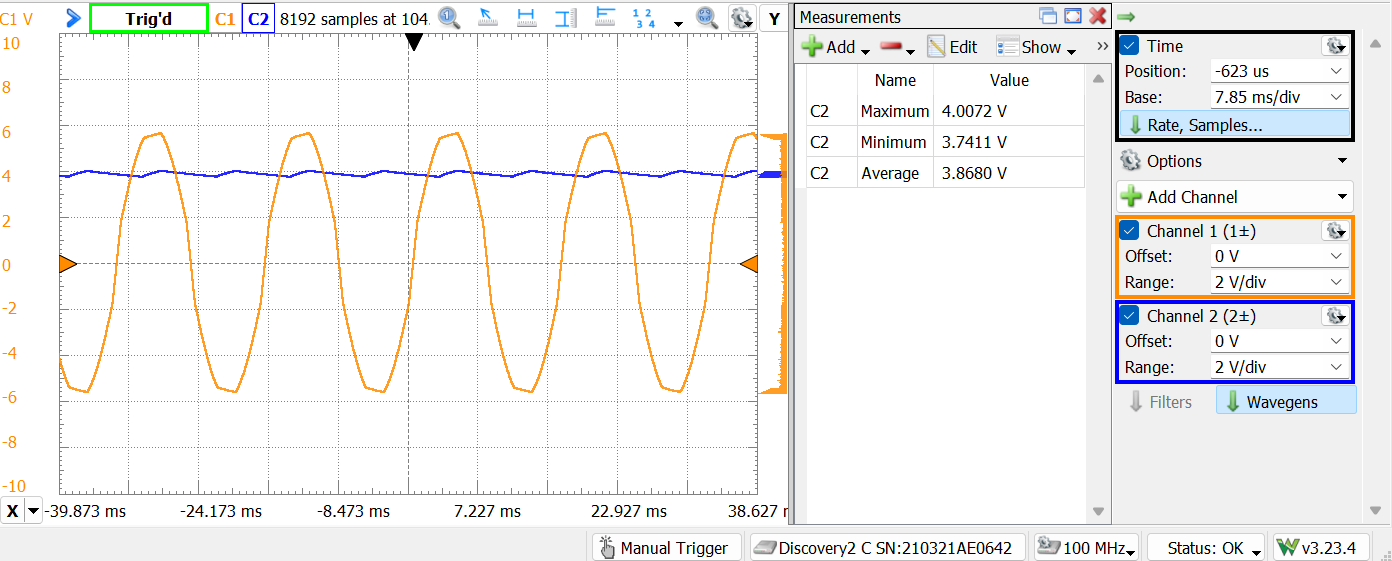

In [35]:
Image("LAB5-5.png")

The resulting scope is shown above. The V_delta is measured to be 4.0042 - 3.7411. This is a V_delta of .26V. A good bit less than the 333mv expectation. I believe there was a mistake somewhere. My next step is to try a different 100 uF capacitor.

## Part 2

The next part of the lab revolves around diode clamps. I will be using w1 and w2 to drive a +5>v>-5 sine wave. With my voltage supply, I will drive a 2V supply. The goal is to predict what v_out will be.

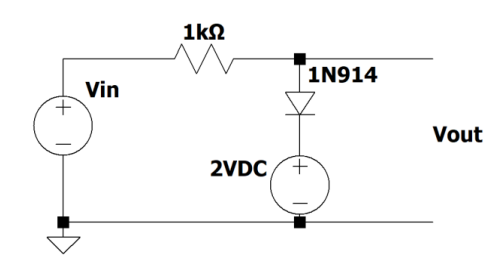

In [7]:
Image("LAB5-6.png")

# Make prediciton for Circuit

First, I will run and build the circuit and see what the results are below.

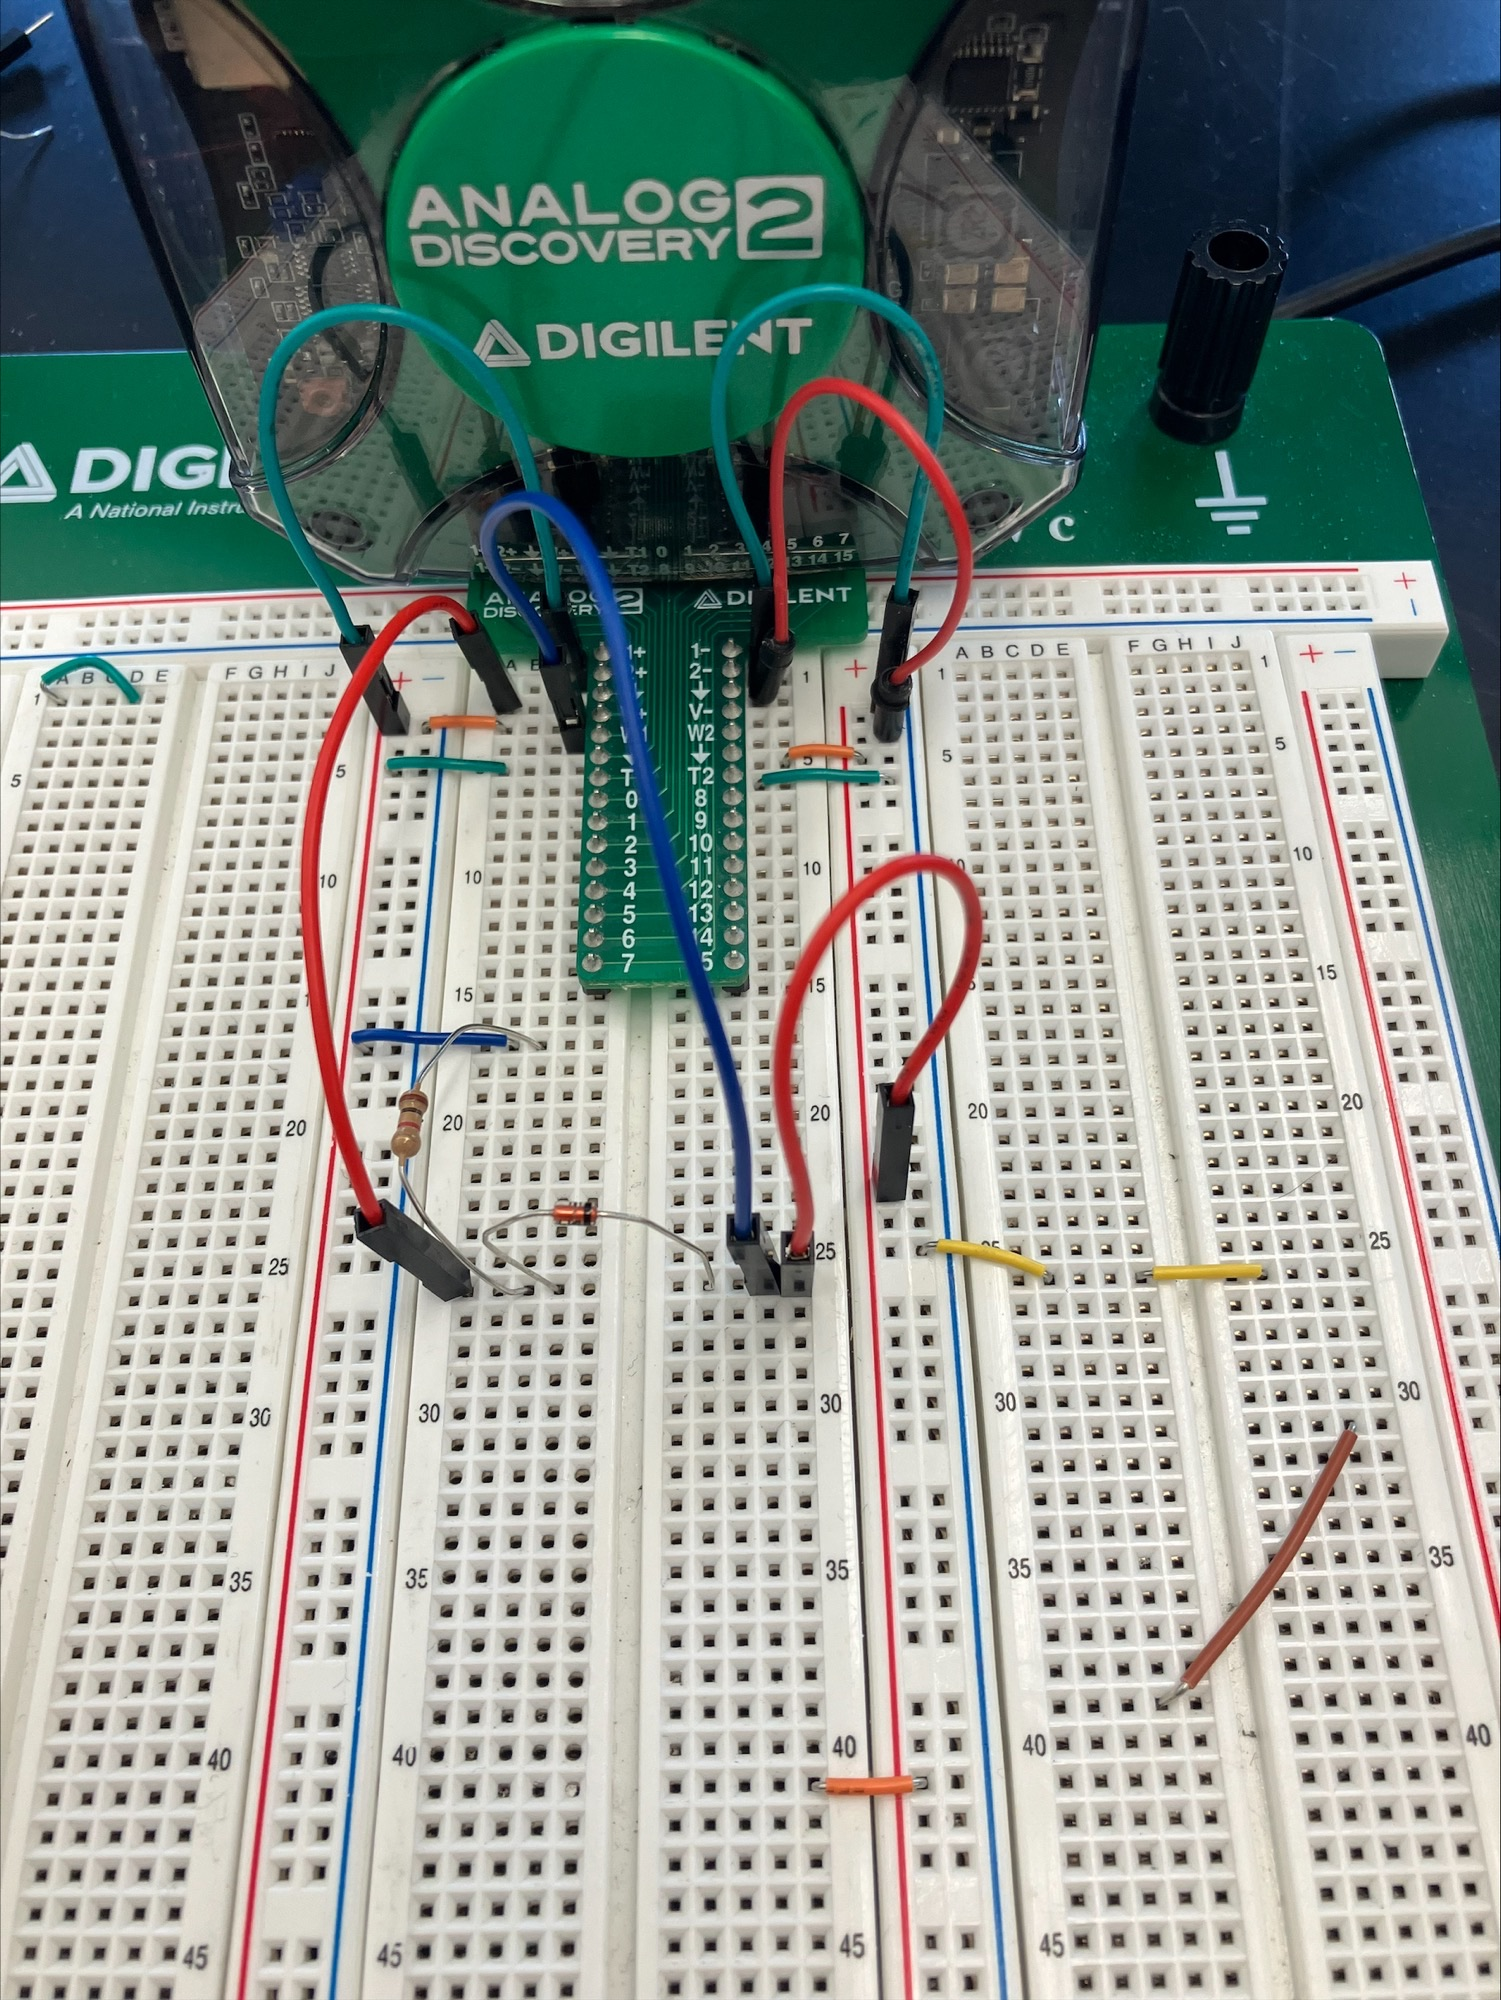

In [22]:
Image("LAB5-3.jpeg")

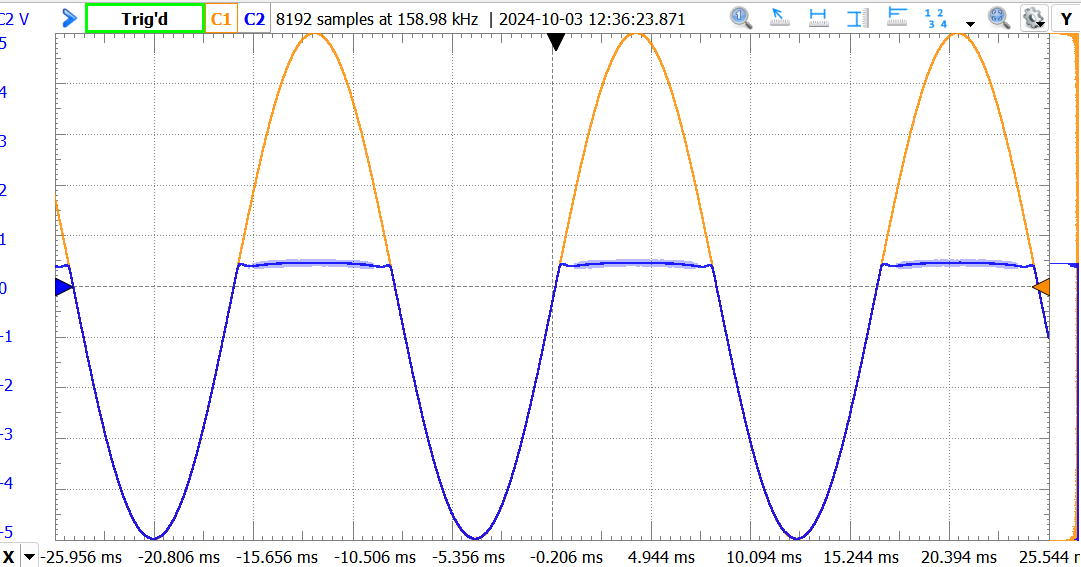

In [19]:
Image("LAB5-7.png")

I am not really sure what this represents. The lab states that I may see what I am looking for if I run a triangle wave. The below image is the result.

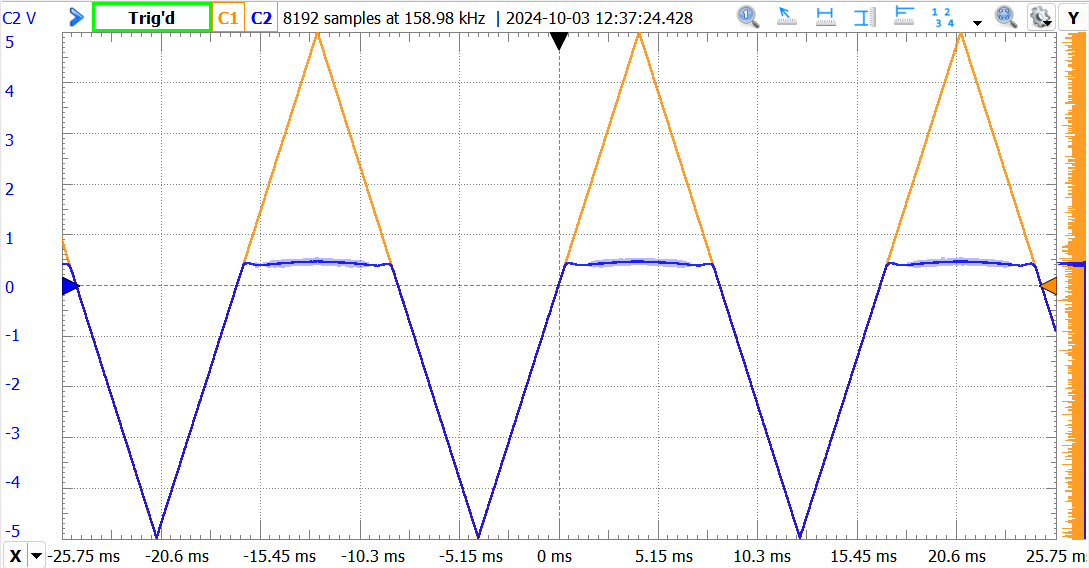

In [21]:
Image("LAB5-8.png")

Next is to create a voltage divider clamp. The circuit diagram and circuit are below. 

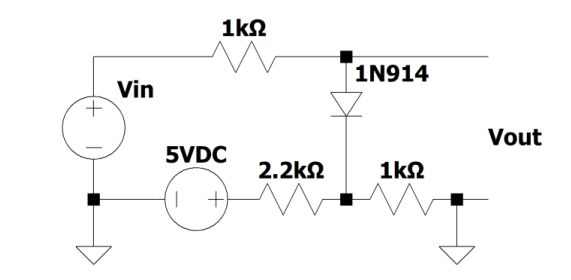

In [17]:
Image("LAB5-9.png")

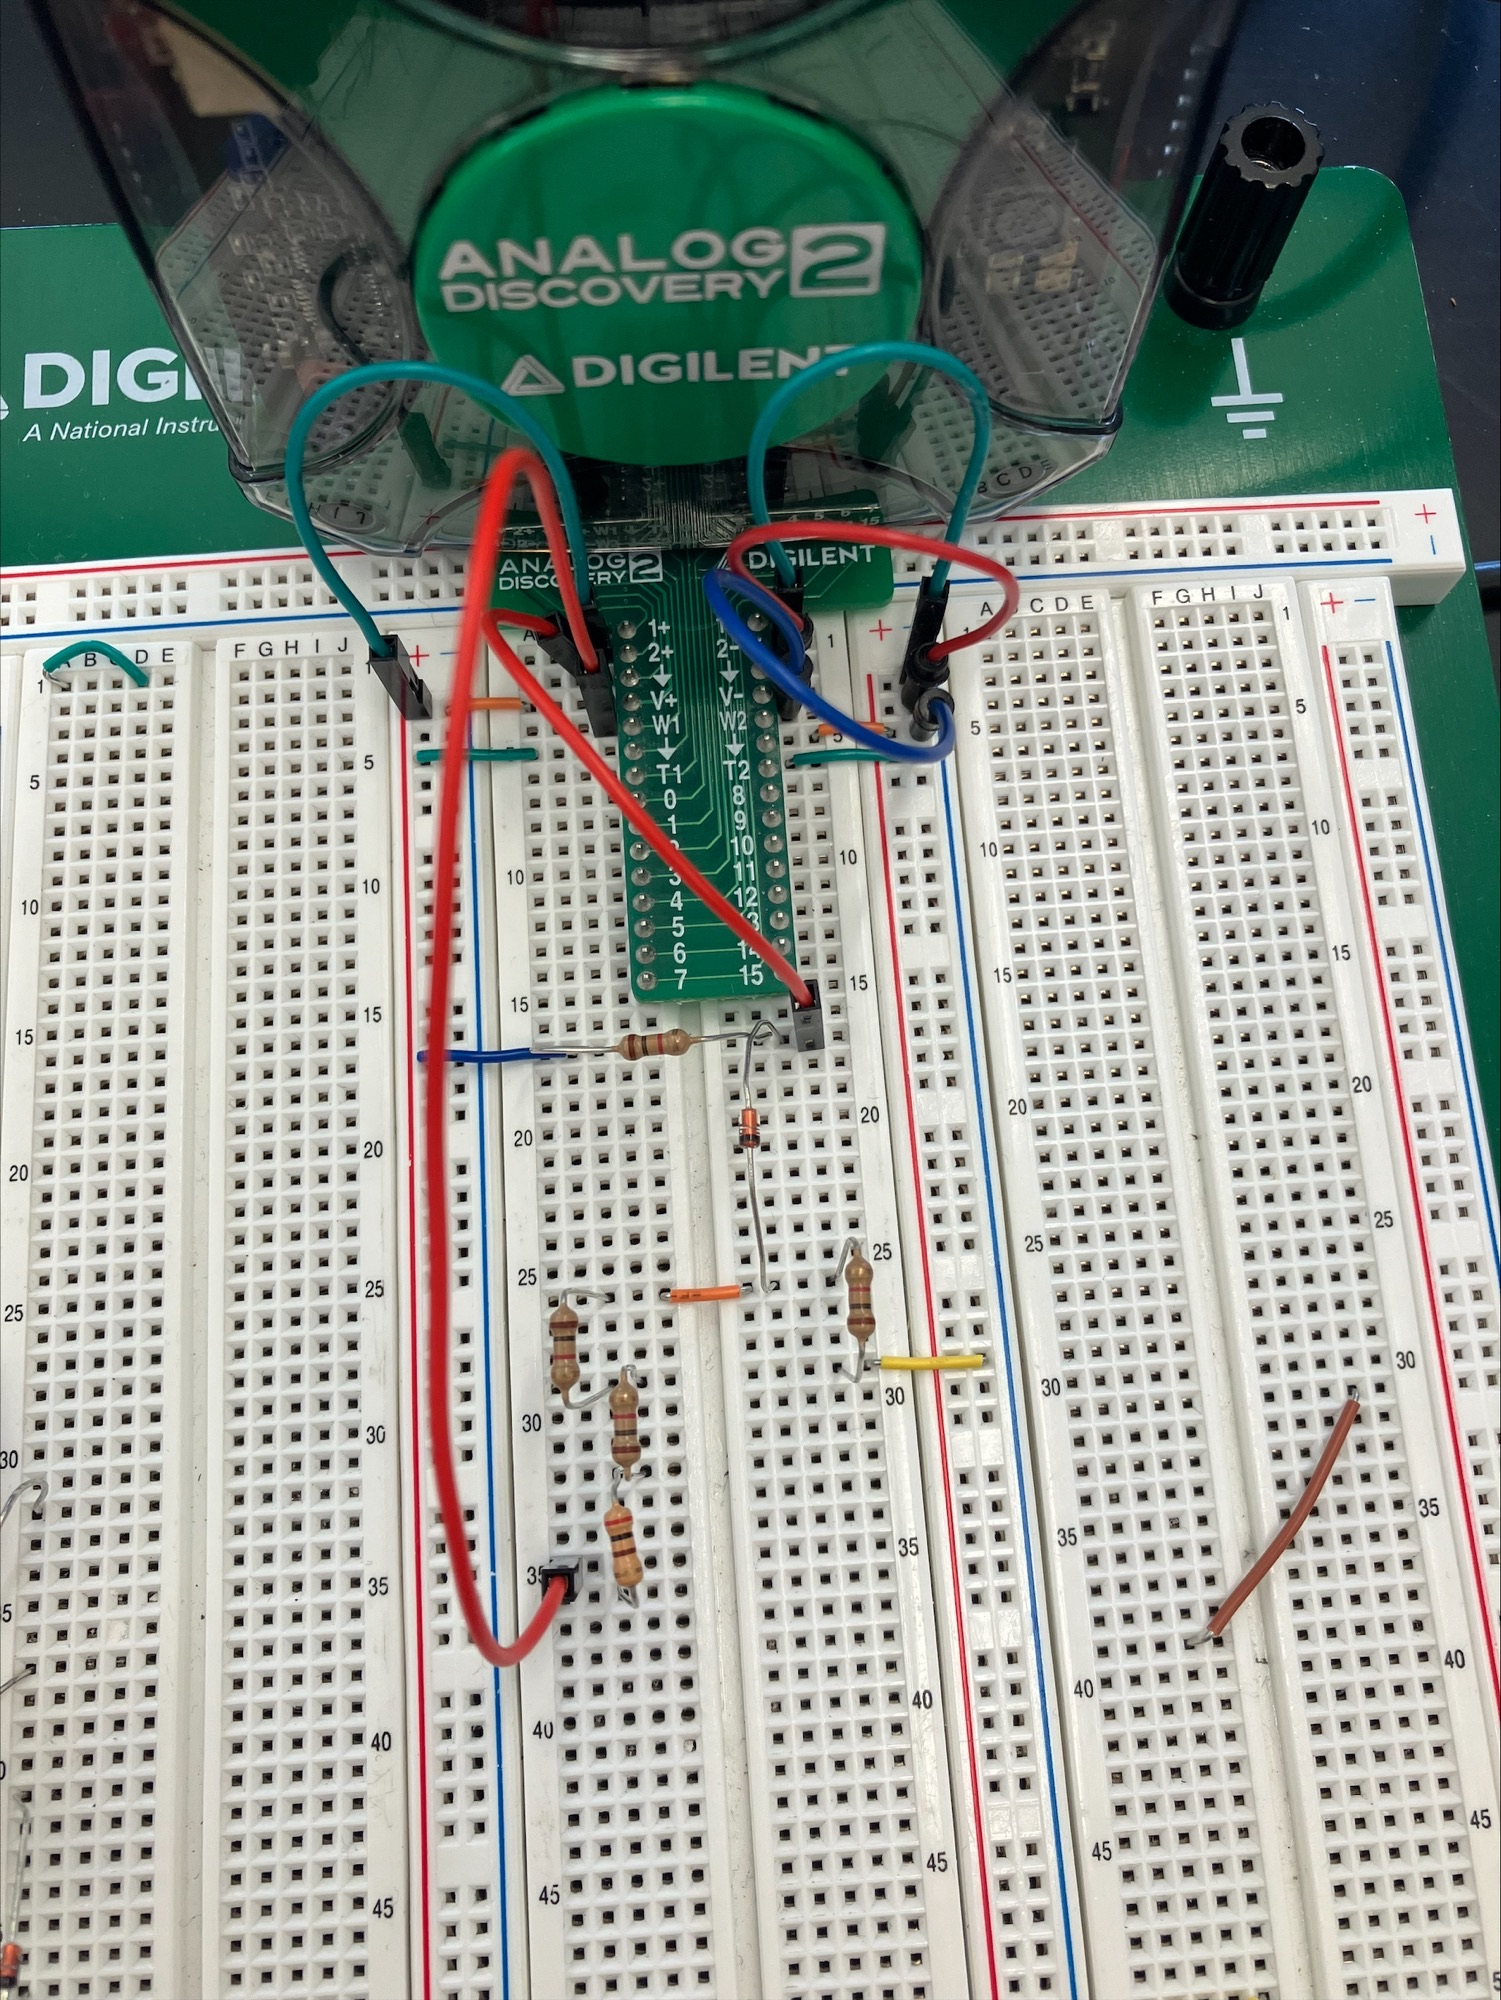

In [19]:
Image("LAB5-4.jpeg")

The lab calls for me to drive a sine wave. The image below has the results.

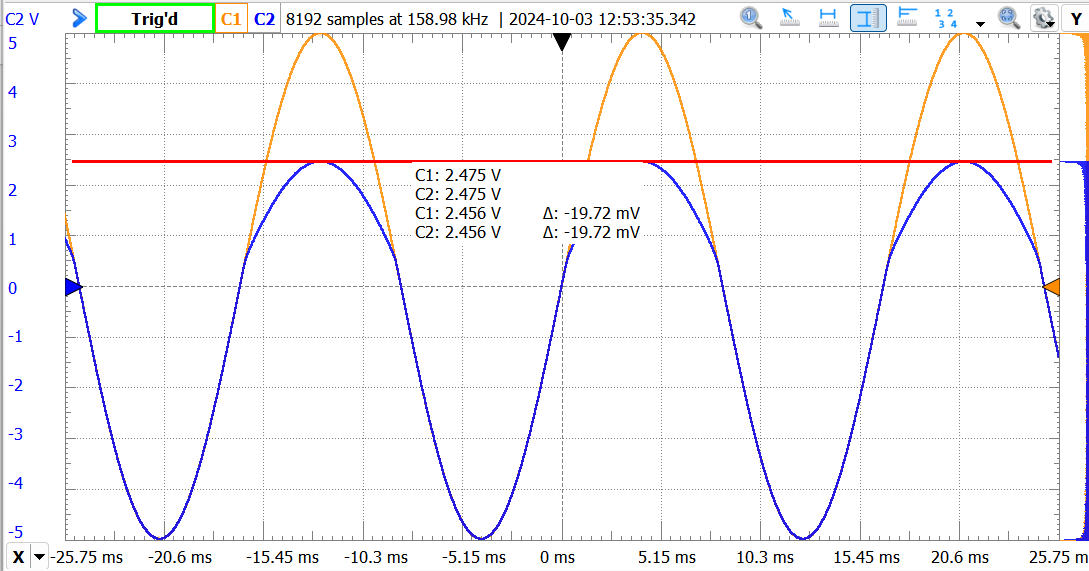

In [24]:
Image("LAB5-10.png")

Now, I need to put a capacitor in parallel with the 1 kOhm. The capacitor will be 10 uF. With the 10uF capacitor, the scope changes to the picture below.

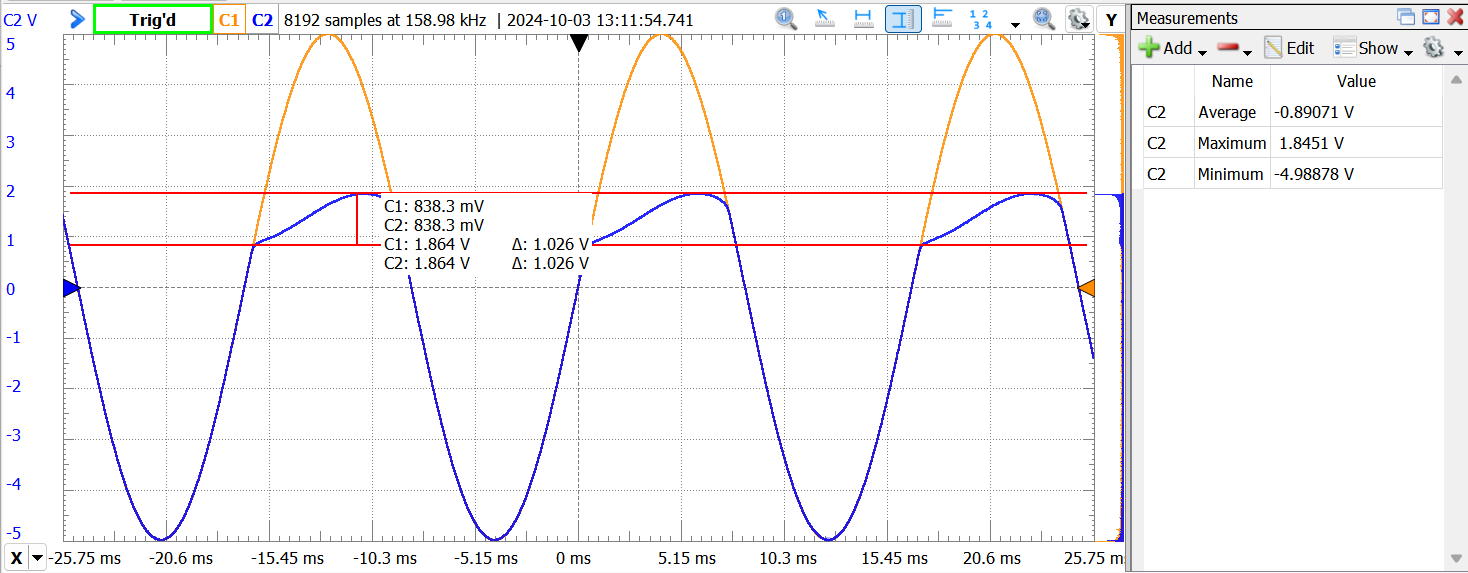

In [32]:
Image("LAB5-11.png")

## Predictions

AC to DC circuit:
    - I predict that the circuit will display the absolute value of the sine wave given to it. When voltage is positive, the current will flow through the top right diode and into the resistor. When the votage is negative, the current will flow through the other three diodes and into the resistor.
- Results:
      - The voltage output is equal to a little less than the absolute value of the voltage source.

AC to DC with cap:
    - The capacitor will prevent the v_out from fluctuating as much as it previously did. The voltage output will still be positive but it will show flatter wave. I believe the voltage output will be aroundc2V, the middle of the max and min voltages.
    - I also predicted the Voltage fluctuation to be about 0.29V. The lab states that this is an approximation. 
- Results:
      - The resulting voltage output is in fact always positive. However, it sits at an almost contant 4.2V. This is higher than the prediction. It seems that the capacitor turns the voltage outup into a 4.2V DC supply. My thoughts are that the capacitor is storing enough energy to be able to release it whenever the voltage in put drops below 4.2V. The slight fluctuations must be representing the capictor running out of charge, just for the voltage across the resistor to rise again. I believe this only works because the voltage across the resistor is positive twice as often throughout time than a regular sine wave.
      - The actual fluctuation comes out to 0.33V. This is a different than the approximation. The discrepancy is 0.04V. With the knowledge that the prediction is only an approximation and that the WaveForms measurements are also only approximations, the discrepancy is not suprising.

## Thevenin Circuit work

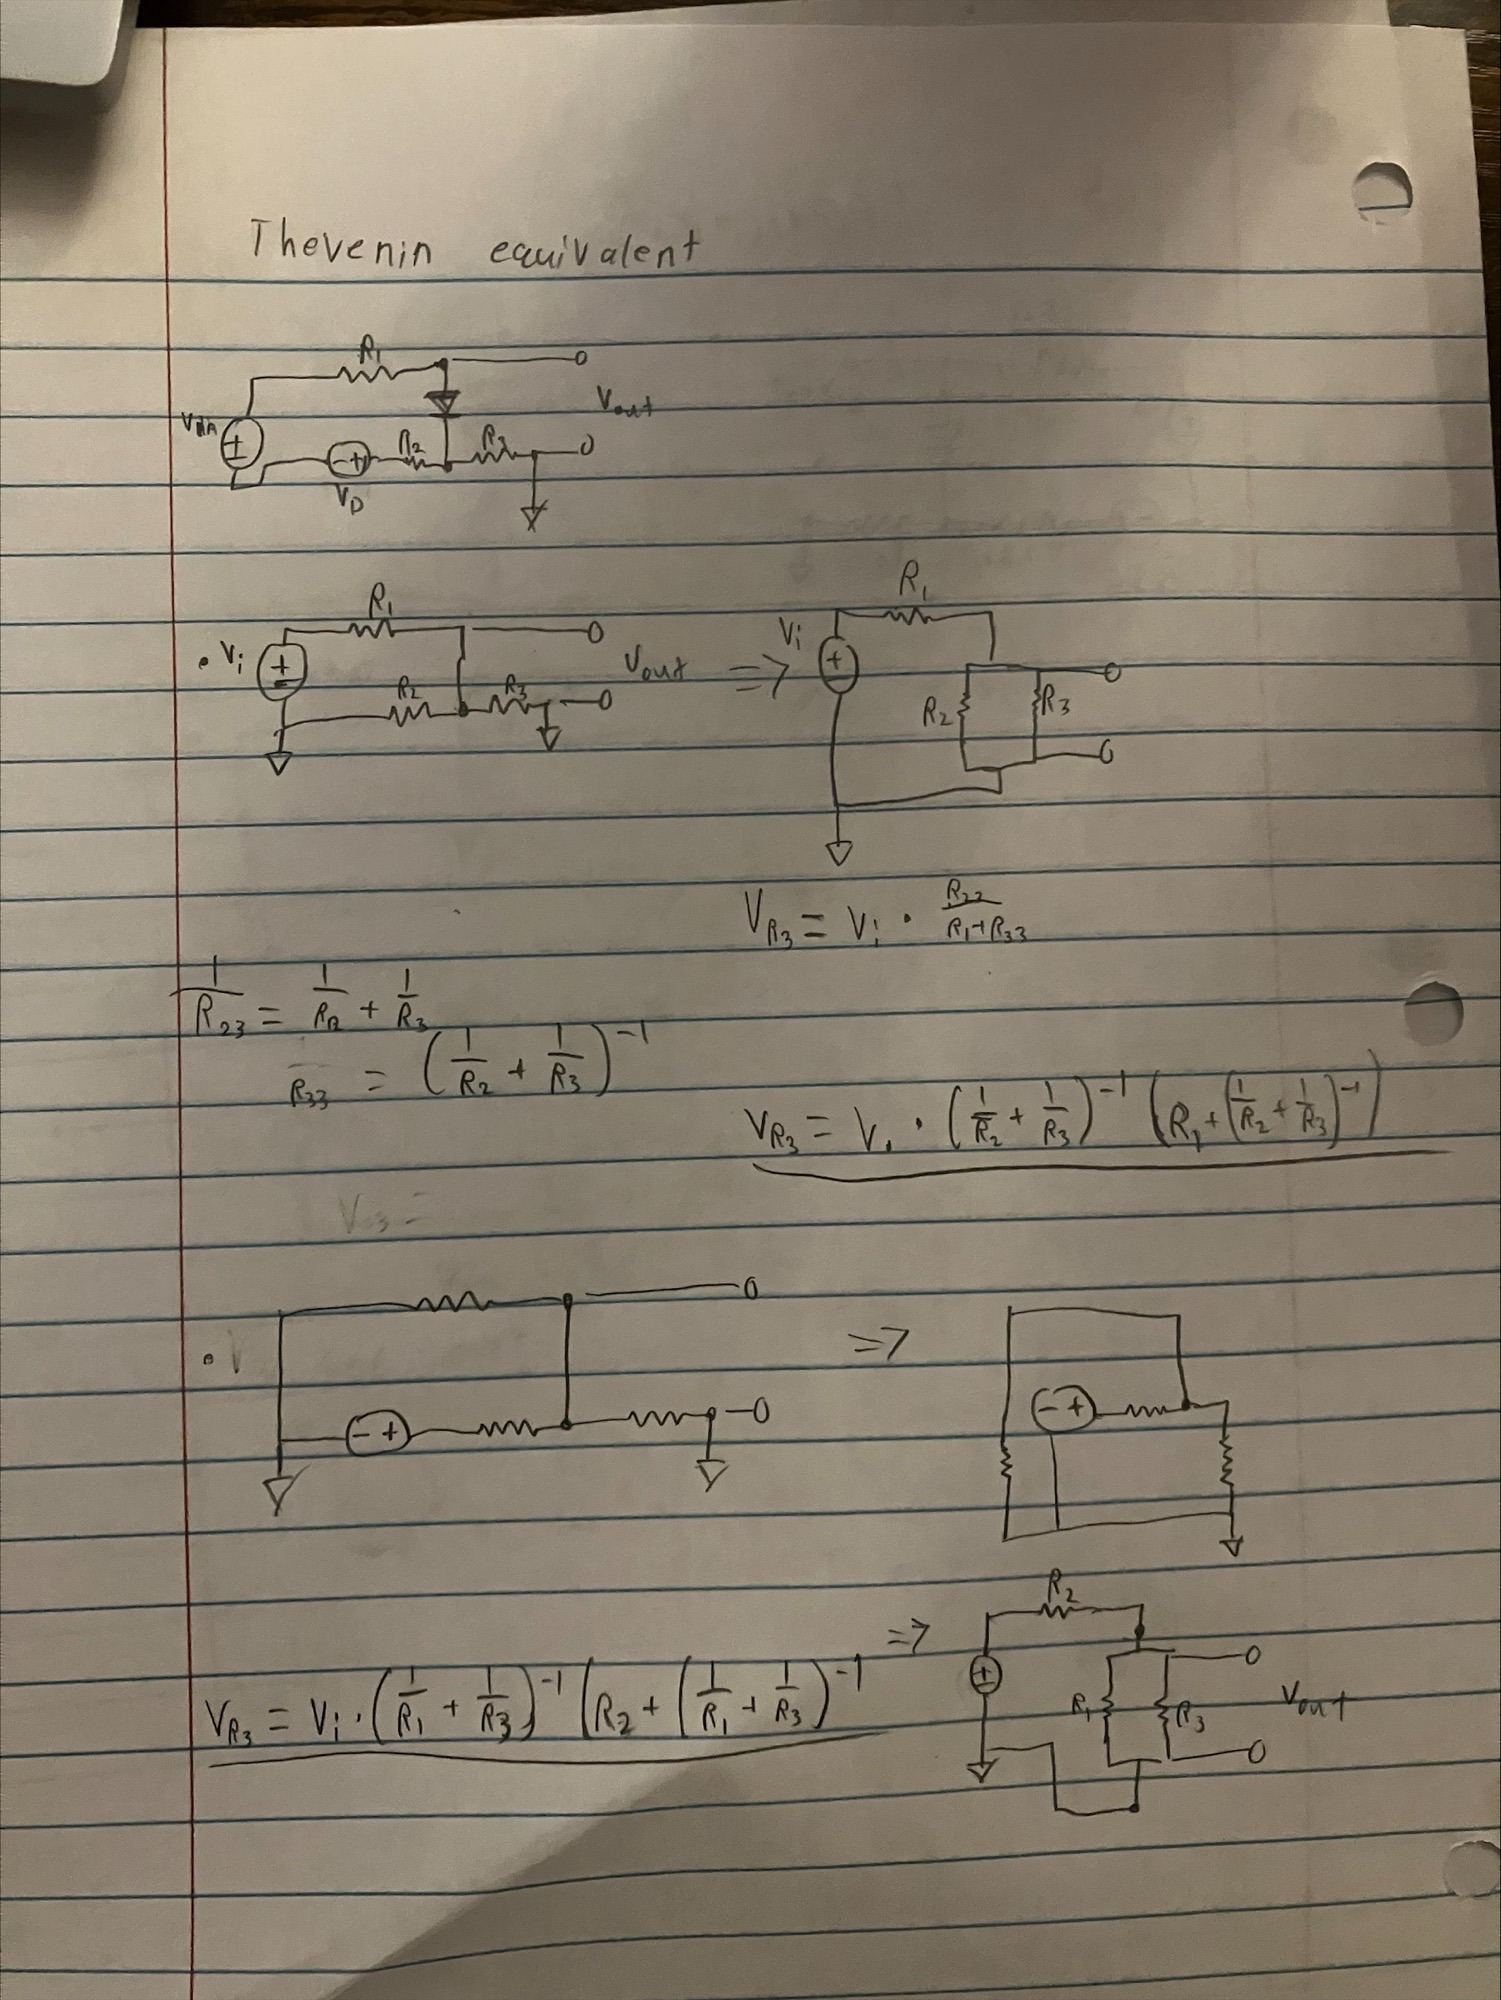

In [33]:
Image("LAB5-TH1.jpeg")

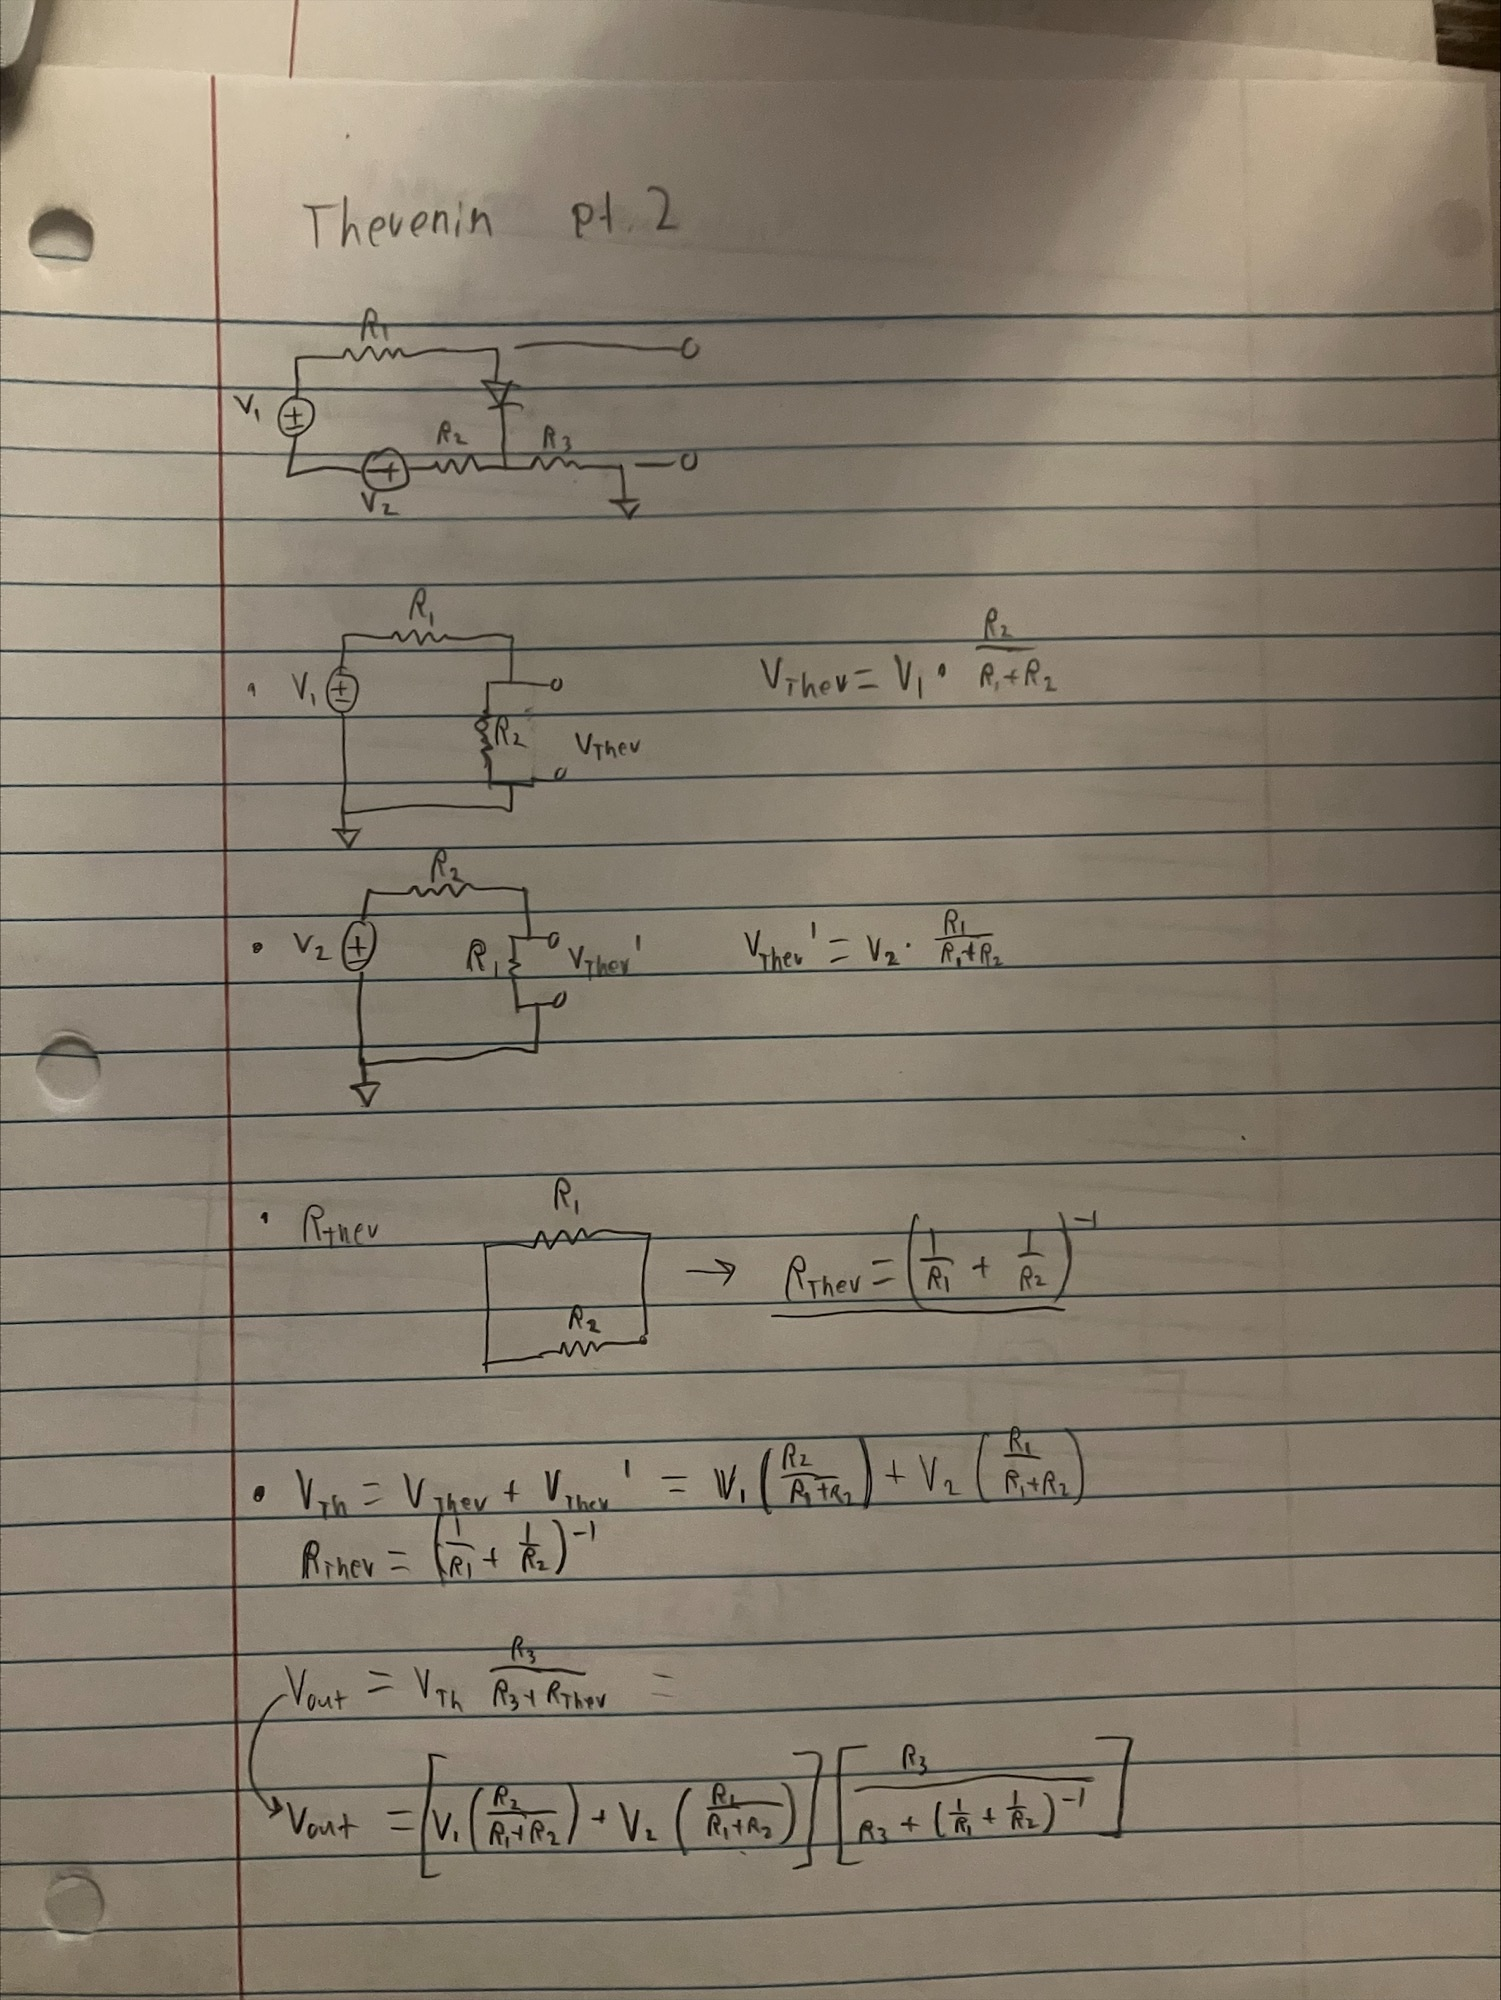

In [35]:
Image("LAB5-TH2.jpeg")

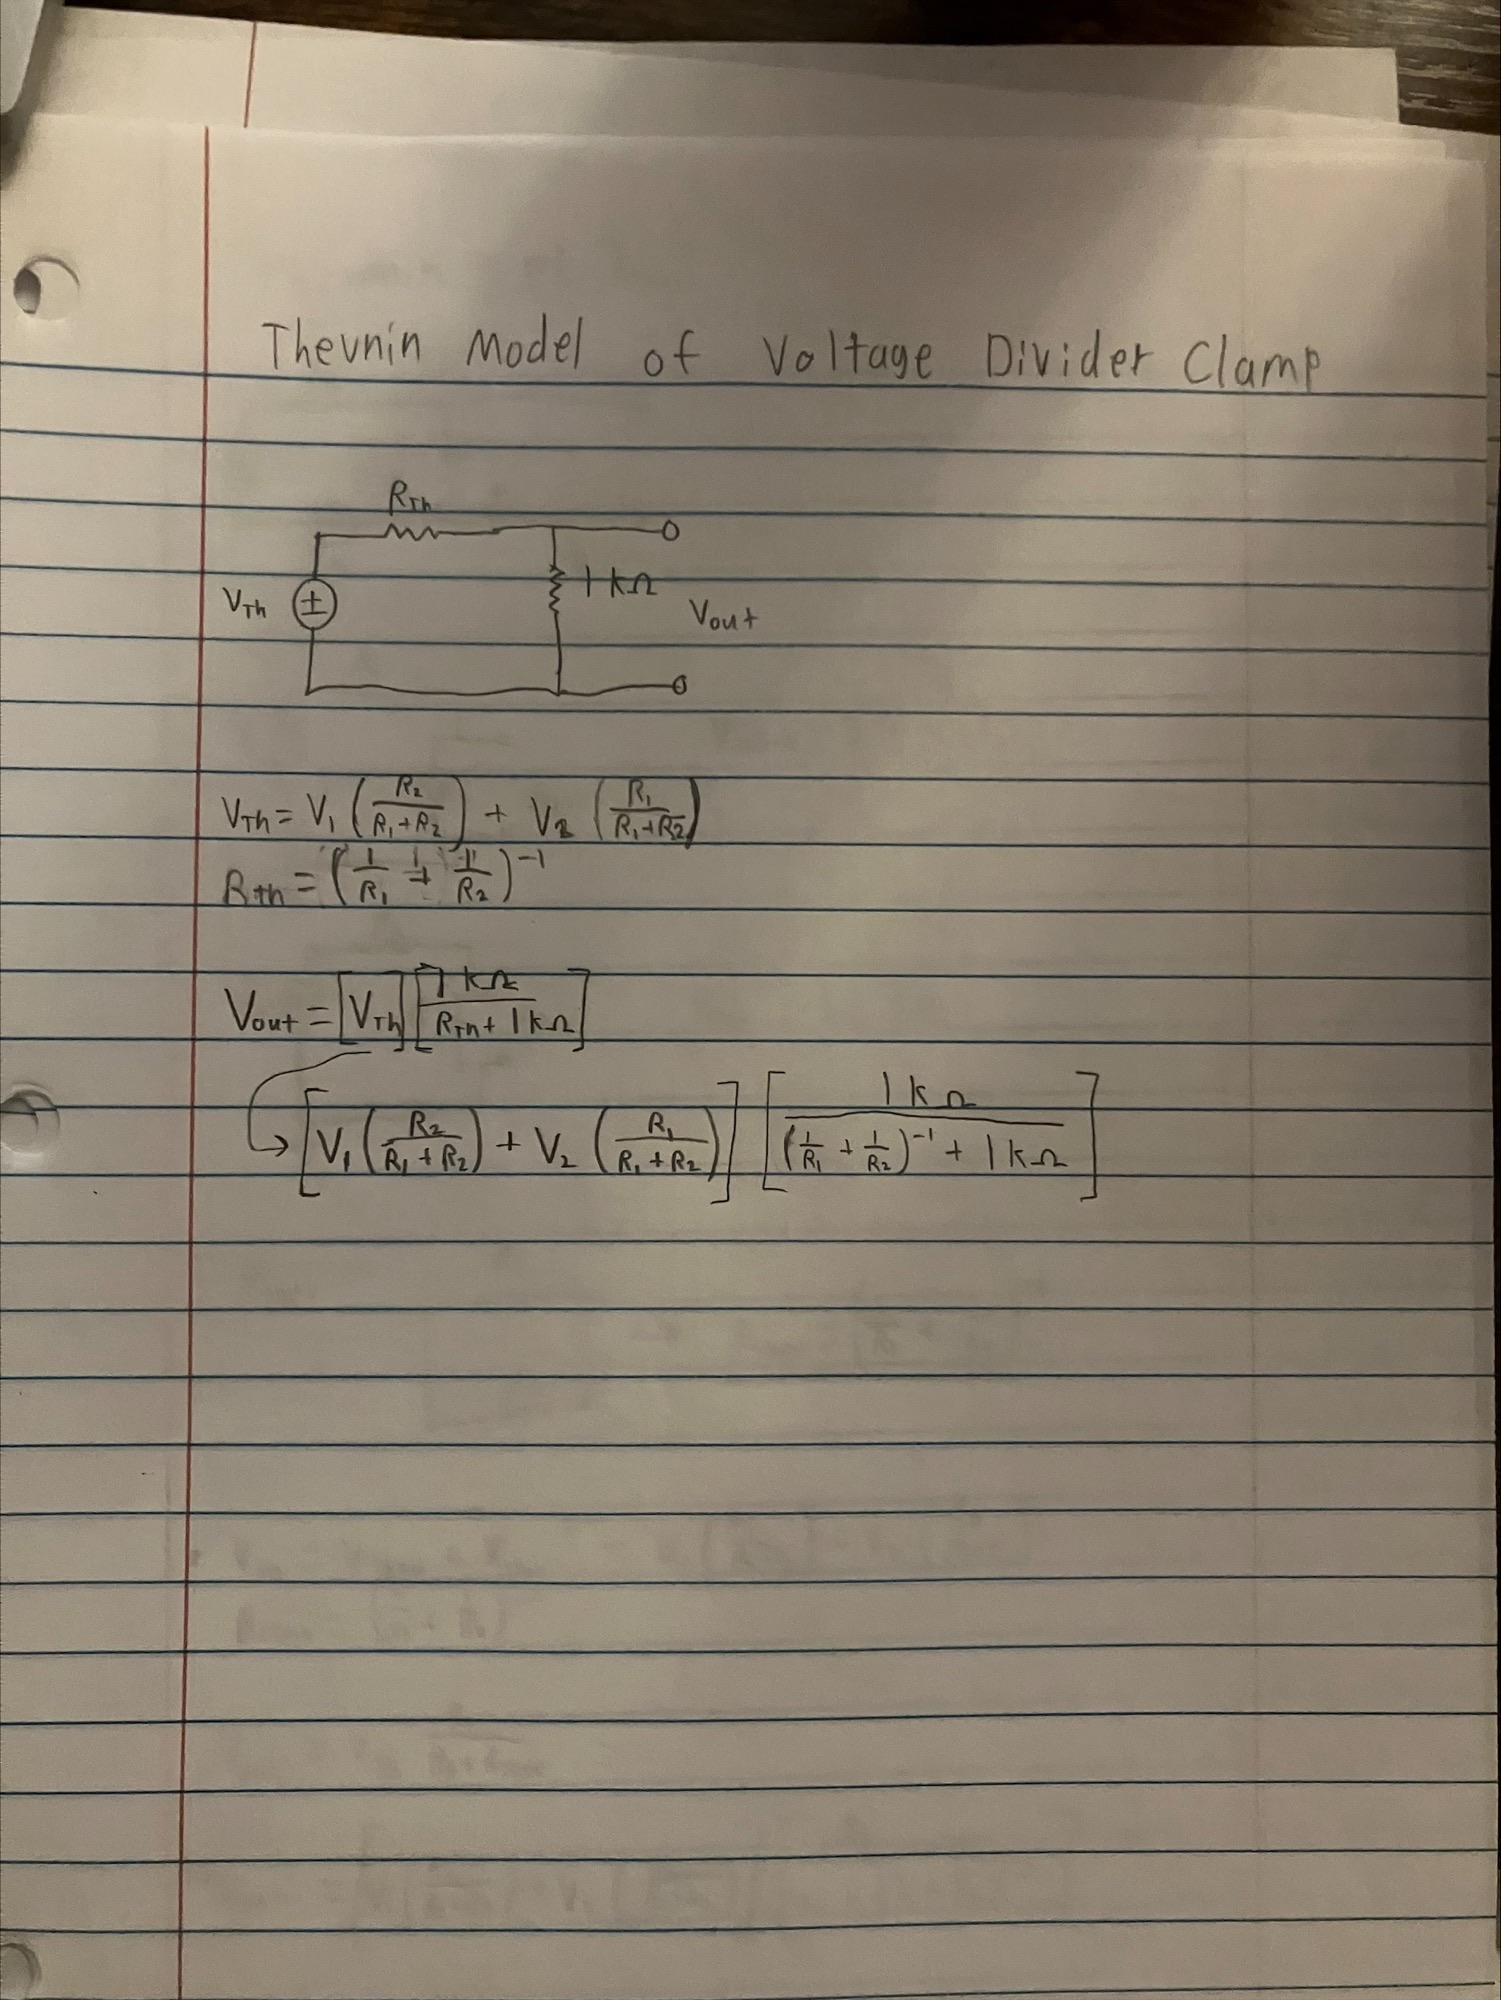

In [37]:
Image("LAB5-TH3.jpeg")